In [3]:
from negi_stuff.modules.imps import (pd, np, xr, za, mpl, plt, sns, pjoin, os, glob,
                              dt, sys, ucp, log, splot, crt, bok)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Loading BokehJS ...

In [10]:
BT  = 'bottom_top'
SN  = 'south_north'
WE  = 'west_east'
XT  = 'XTIME'
XLA = 'XLAT'
XLO = 'XLONG'
P, V, U, T = 'P','V','U','T'
path='../../data_sample/wrf_out.small.h5'
ds = xr.open_dataset(path)

In [15]:
_da = ds[T]

_da = _da[{
    BT:0,
    SN:10,
    WE:11
}] + 300

In [18]:
_df = _da.to_dataframe()

In [34]:
f = bok.figure_dt()
f.line(source=_df,x='XTIME',y='T')
f.plot_height = 200
bok.show(f)

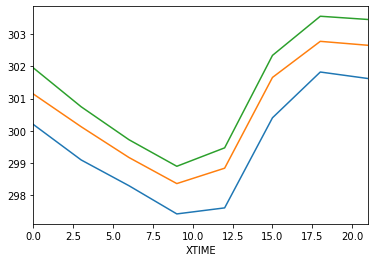

In [66]:
f, ax = plt.subplots()
_group = _df['T'].groupby(_df.index.hour)
qs = [.25,.5,.75]
for q in qs:
    _group.quantile(q).plot(ax=ax, label=q)

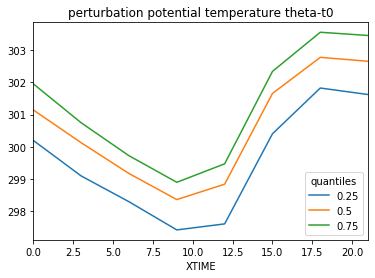

In [69]:
ax.set_title(ds['T'].description)
ax.legend(title='quantiles')
ax.figure

In [90]:
_df1 = _df
_df1['day'] = _df.index.date

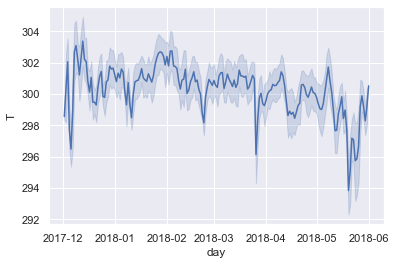

In [100]:
fig, ax = plt.subplots()
sns.lineplot(x='day',y='T',data = _df1.reset_index(),ax=ax)


In [102]:
ax.plot_date(_df1['day'],_df1['T'],marker=',')
fig.autofmt_xdate()

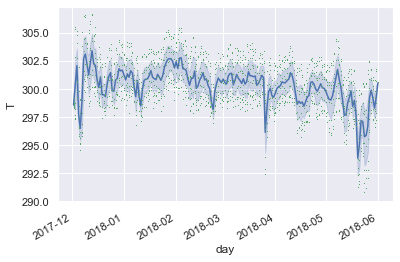

In [103]:
ax.figure